In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

In [64]:
df = pd.read_csv(
        'btc-eth-prices-outliers.csv',
        index_col=0,
        parse_dates=True
)

When index_col=0, it means that the first column in the CSV file will be used as the index of the resulting dataframe. So, the values in the first column of the CSV file will become the row labels in the resulting dataframe. This can be useful when you want to use a specific column in the CSV file as a unique identifier for the rows.
The parse_dates argument in the pandas.read_csv function is used to specify whether or not to parse the date-like values in the CSV file as actual dates. If parse_dates=True, then date-like columns will be parsed as actual dates and stored in the dataframe as datetime objects. If parse_dates=False (the default value), then date-like columns will be read in as strings.


In [65]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<AxesSubplot: xlabel='Timestamp'>

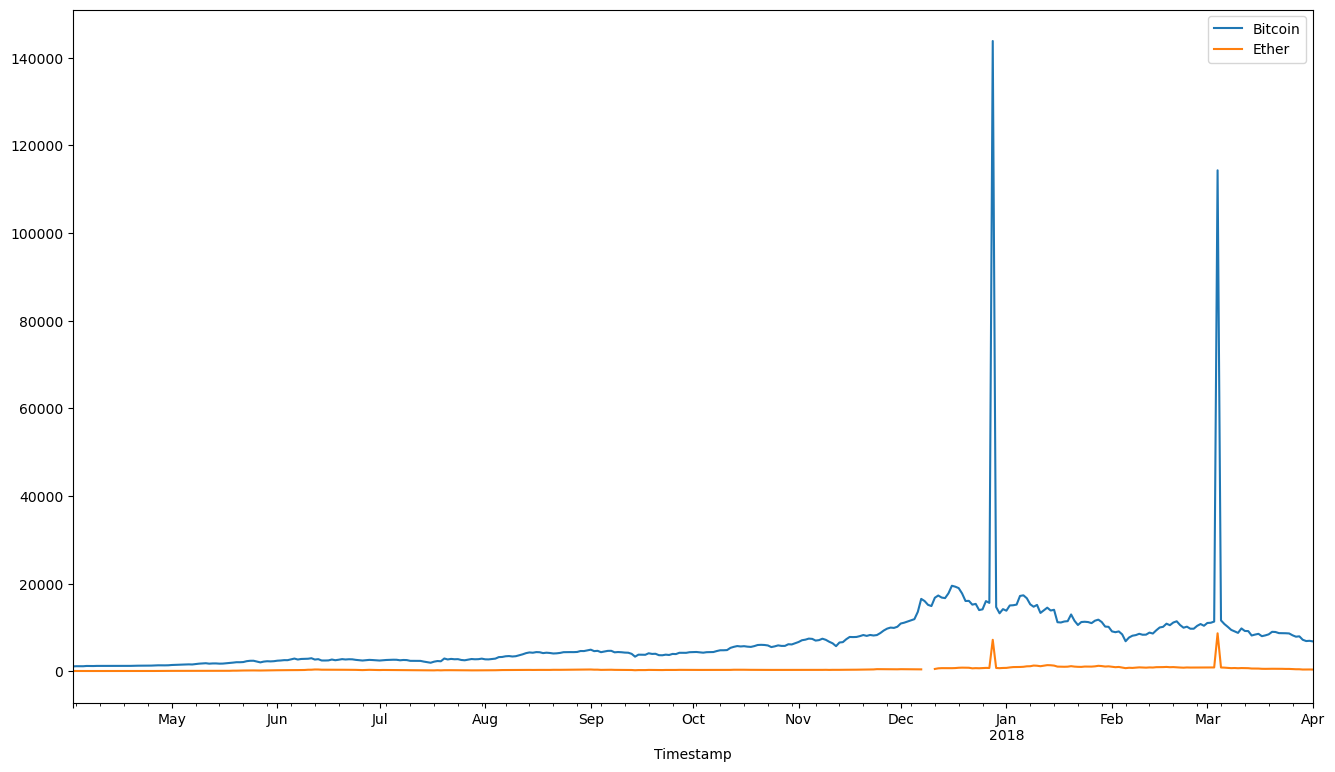

In [66]:
df.plot(figsize=(16,9))

<AxesSubplot: xlabel='Timestamp'>

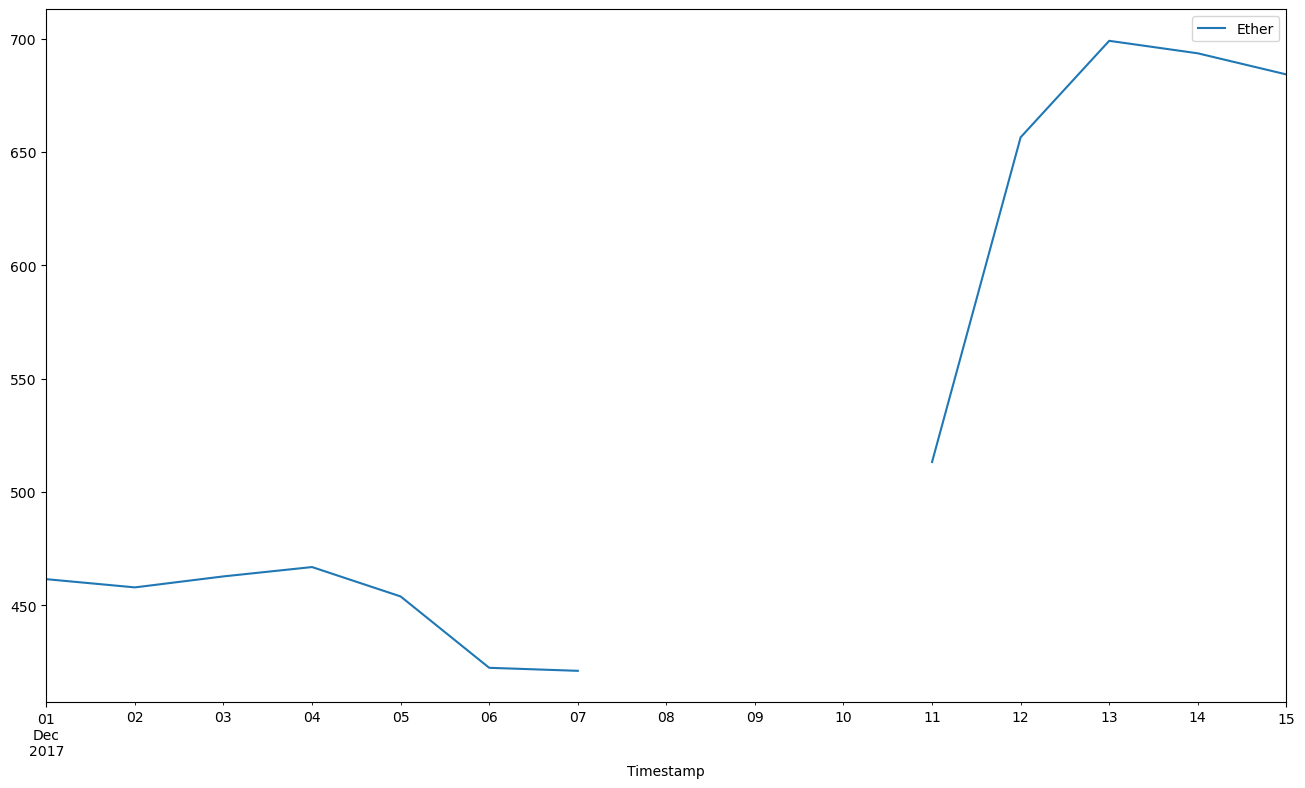

In [67]:
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16,9))

In [68]:
df_na = df.loc['2017-12':'2017-12-15']

In [69]:
df_na['Ether'].isna().values.any()

True

In [70]:
df_na.loc[df['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [71]:
df_na.loc['2017-12-6':'2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [72]:
df_na.loc['2017-12-6':'2017-12-12'].fillna(method='bfill')

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [73]:
df.fillna(method='bfill',inplace=True)

<AxesSubplot: xlabel='Timestamp'>

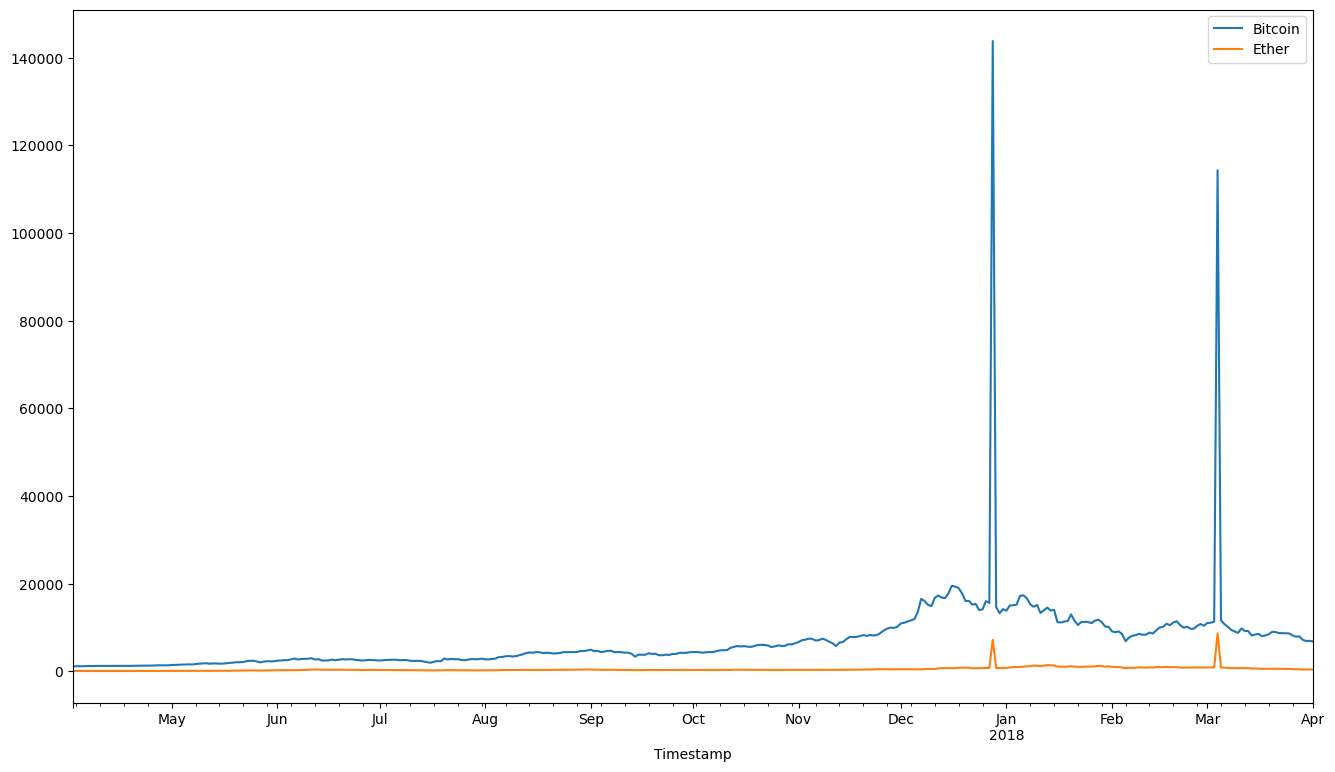

In [74]:
df.plot(figsize=(16,9))

<AxesSubplot: xlabel='Timestamp'>

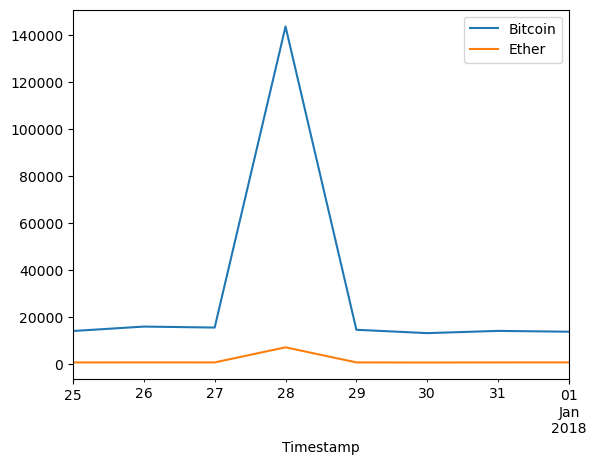

In [75]:
df['2017-12-25':'2018-01-01'].plot()

<AxesSubplot: xlabel='Timestamp'>

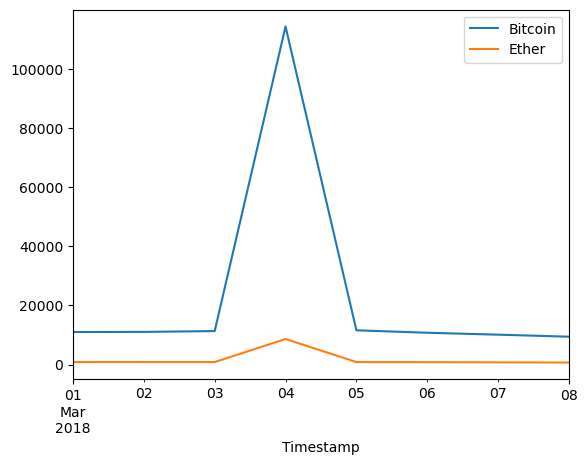

In [76]:
df['2018-03-01':'2018-03-08'].plot()

In [77]:
df_cleaned = df.drop(pd.to_datetime(['2017-12-28','2018-03-04']))

<AxesSubplot: xlabel='Timestamp'>

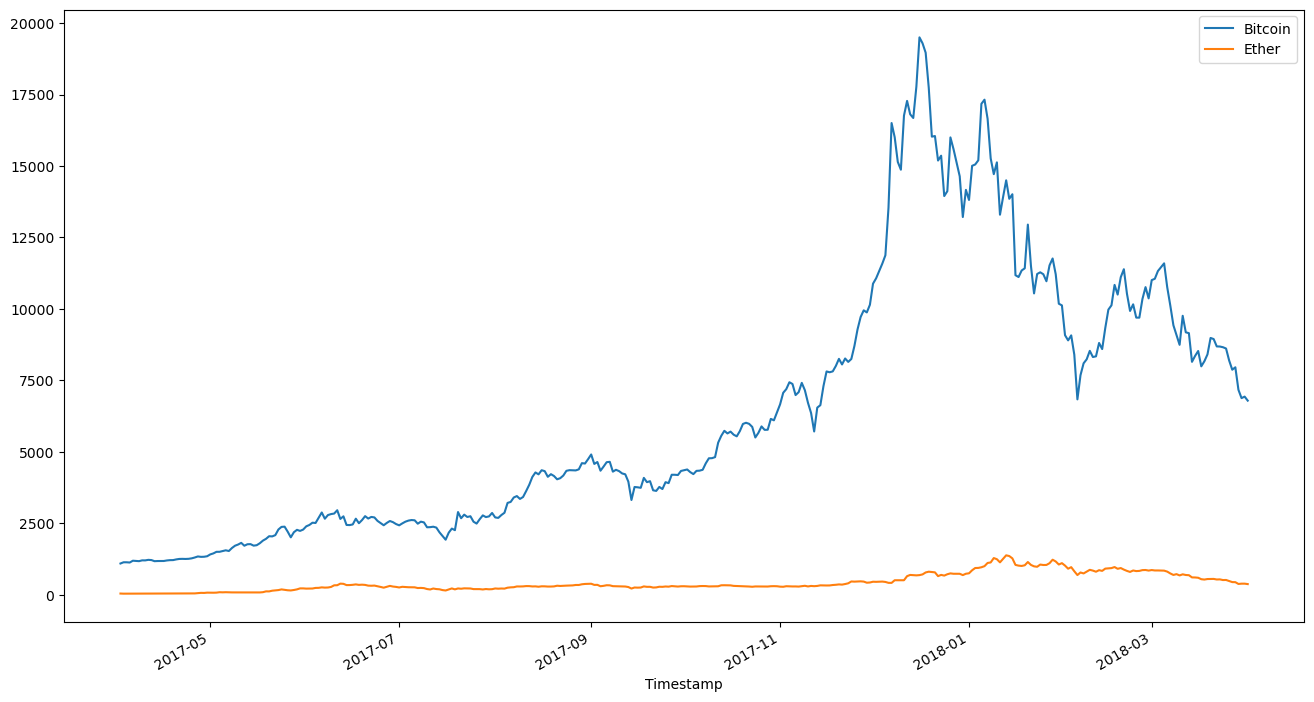

In [78]:
df_cleaned.plot(figsize=(16,9))

In [79]:
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

In [80]:
df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

In [81]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

<AxesSubplot: ylabel='Frequency'>

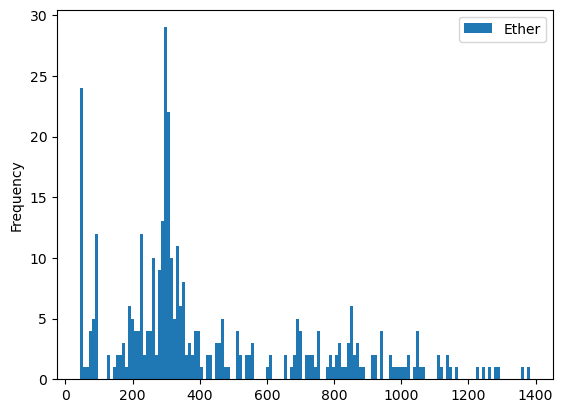

In [82]:
df_cleaned.plot(kind='hist',y='Ether',bins=150)

The bins argument is often used in histograms to specify the number of intervals, or bins, in which to divide the data range. This is useful for controlling the granularity of the histogram and making it easier to visualize the distribution of the data.

<AxesSubplot: ylabel='Frequency'>

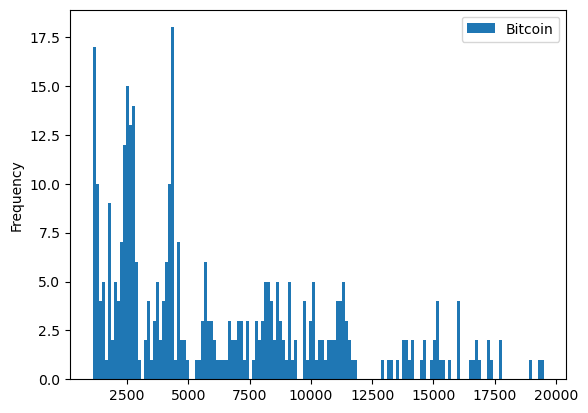

In [83]:
df_cleaned.plot(kind='hist',y='Bitcoin',bins=150)

C:\Users\rokzu\AppData\Local\Temp\ipykernel_21648\1042056682.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Ether'],ax=ax)


<AxesSubplot: xlabel='Ether', ylabel='Density'>

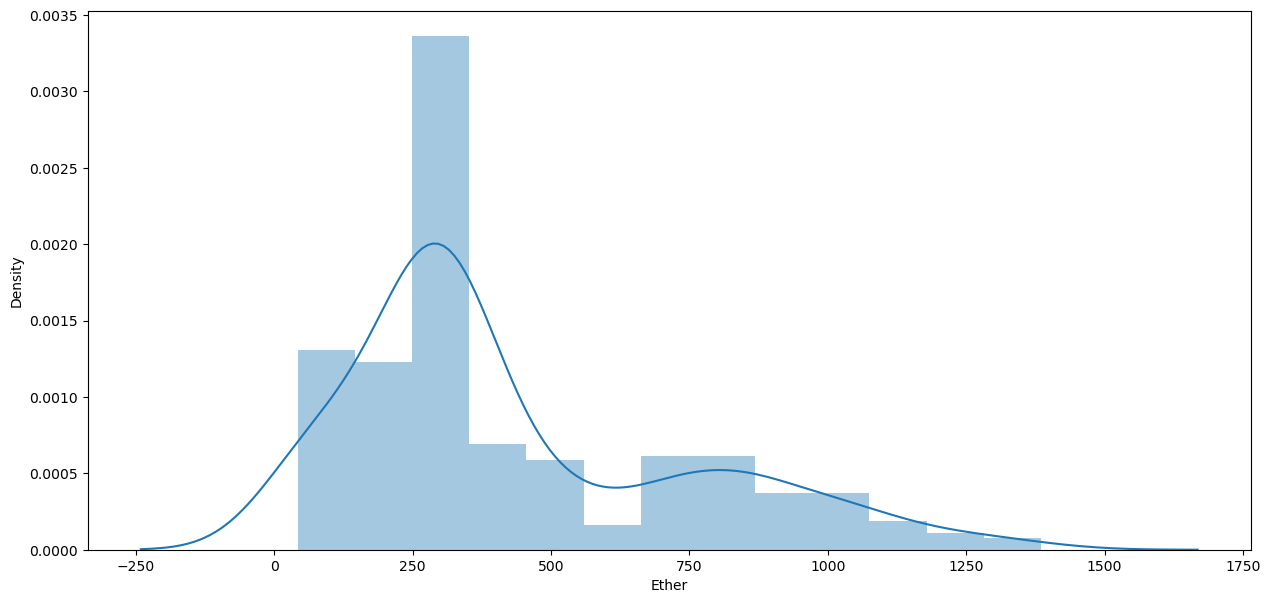

In [84]:
fig, ax = plt.subplots(figsize=(15,7))
sns.distplot(df_cleaned['Ether'],ax=ax)

C:\Users\rokzu\AppData\Local\Temp\ipykernel_21648\2686247518.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'],rug=True,ax=ax)


<AxesSubplot: xlabel='Bitcoin', ylabel='Density'>

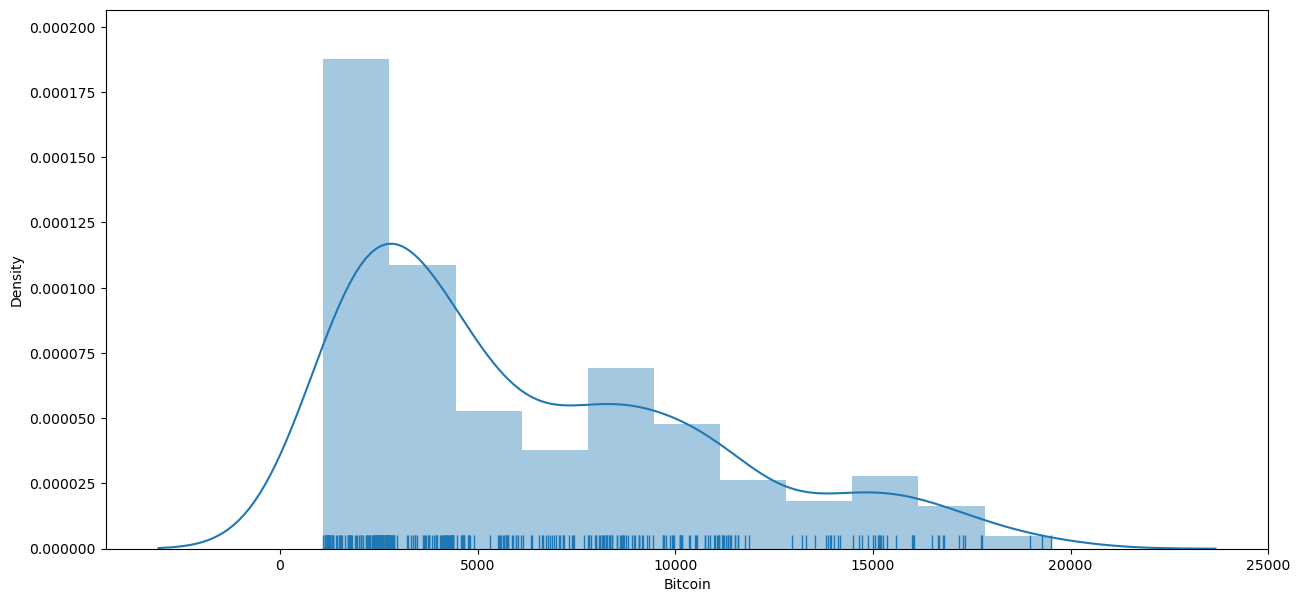

In [85]:
fig, ax = plt.subplots(figsize=(15,7))
sns.distplot(df_cleaned['Bitcoin'],rug=True,ax=ax)

C:\Users\rokzu\AppData\Local\Temp\ipykernel_21648\2913919508.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['Ether'],shade=True,cut=0,ax=ax)


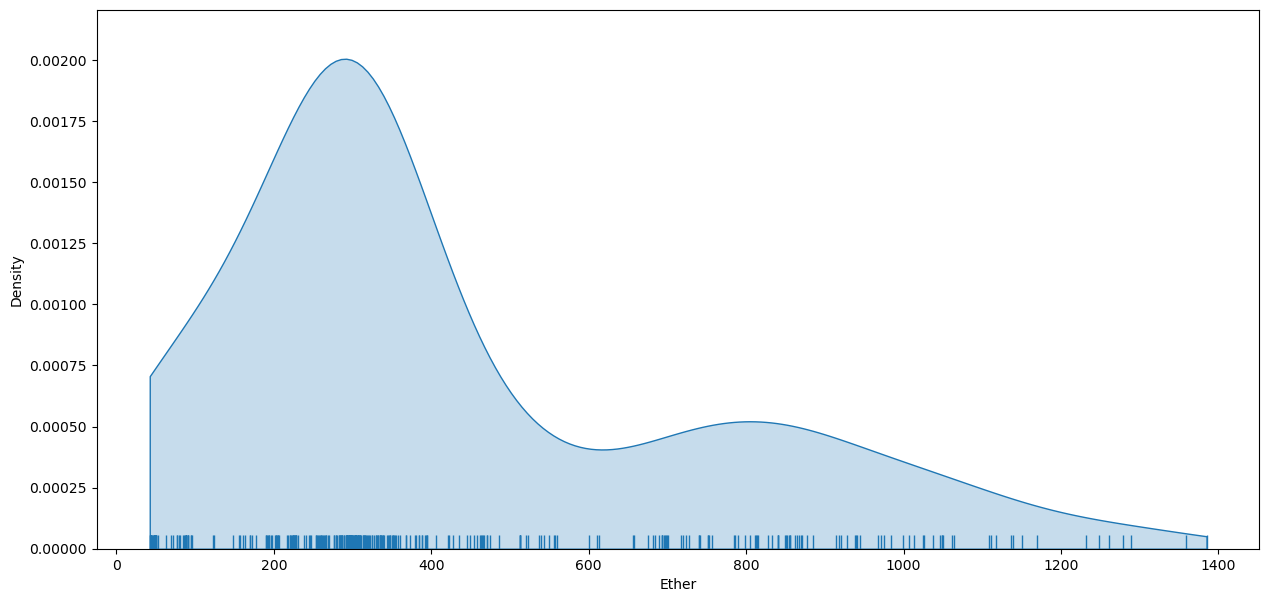

In [86]:
fig, ax = plt.subplots(figsize=(15,7))
sns.kdeplot(df_cleaned['Ether'],shade=True,cut=0,ax=ax)
sns.rugplot(df_cleaned['Ether'],ax=ax);

This code is using the matplotlib and seaborn libraries to create a density plot and a rug plot for the data in the 'Ether' column of a DataFrame df_cleaned.

The first line creates a figure fig and an axes object ax using the subplots function from matplotlib. The figsize argument is used to set the size of the figure to (15,7).

The second line uses the kdeplot function from the seaborn library to create a kernel density estimate (KDE) plot. The shade argument is set to True to fill the area under the curve with color, the cut argument is set to 0 to ensure that the density estimate is calculated over the entire range of the data, and the ax argument is set to ax to specify the axes object on which to plot the data.

The third line uses the rugplot function from seaborn to create a rug plot, which is a set of vertical lines that represent individual observations in the data. The ax argument is again set to ax to ensure that the rug plot is plotted on the same axes object as the KDE plot.

The semicolon at the end of the code is used to suppress the output of the plotting functions, which would otherwise display information about the plot in the output area.

C:\Users\rokzu\AppData\Local\Temp\ipykernel_21648\858420874.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'],ax=ax,


RuntimeError: Cumulative KDE evaluation requires scipy

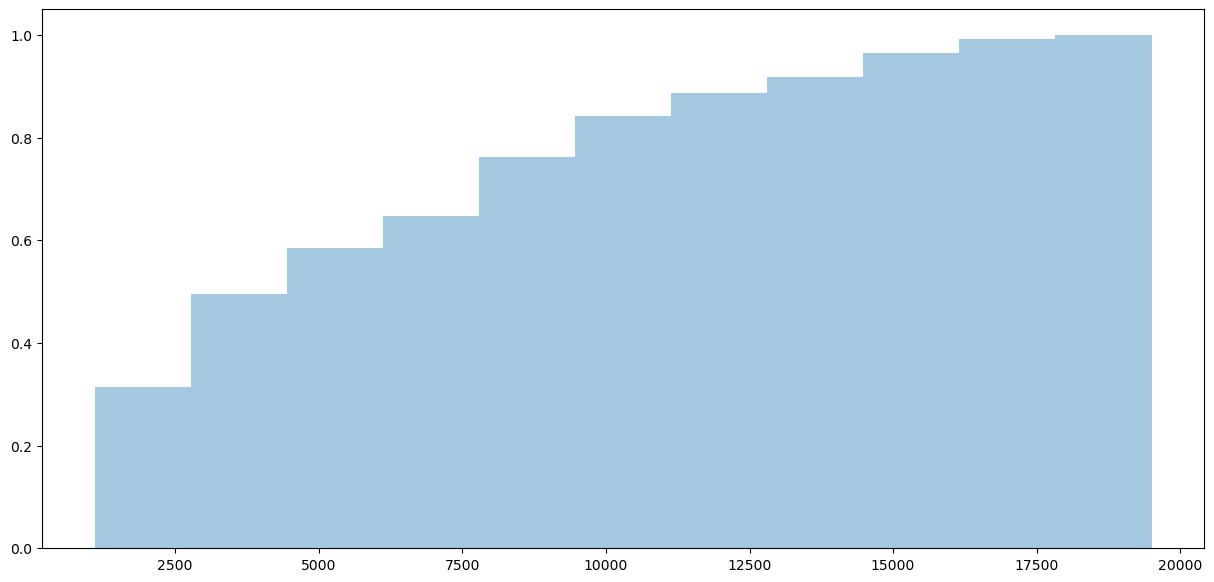

In [87]:
import scipy
fig, ax = plt.subplots(figsize=(15,7))
sns.distplot(df_cleaned['Bitcoin'],ax=ax,
            hist_kws=dict(cumulative=True),
            kde_kws=dict(cumulative=True))

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.distplot(df_cleaned['Bitcoin'],ax=ax,bins=50,
            hist_kws=dict(cumulative=True),
            kde_kws=dict(cumulative=True))

In [ ]:
sns.jointplot(x='Bitcoin',y='Ether',data=df_cleaned,size=9)

<AxesSubplot: xlabel='Bitcoin', ylabel='Ether'>

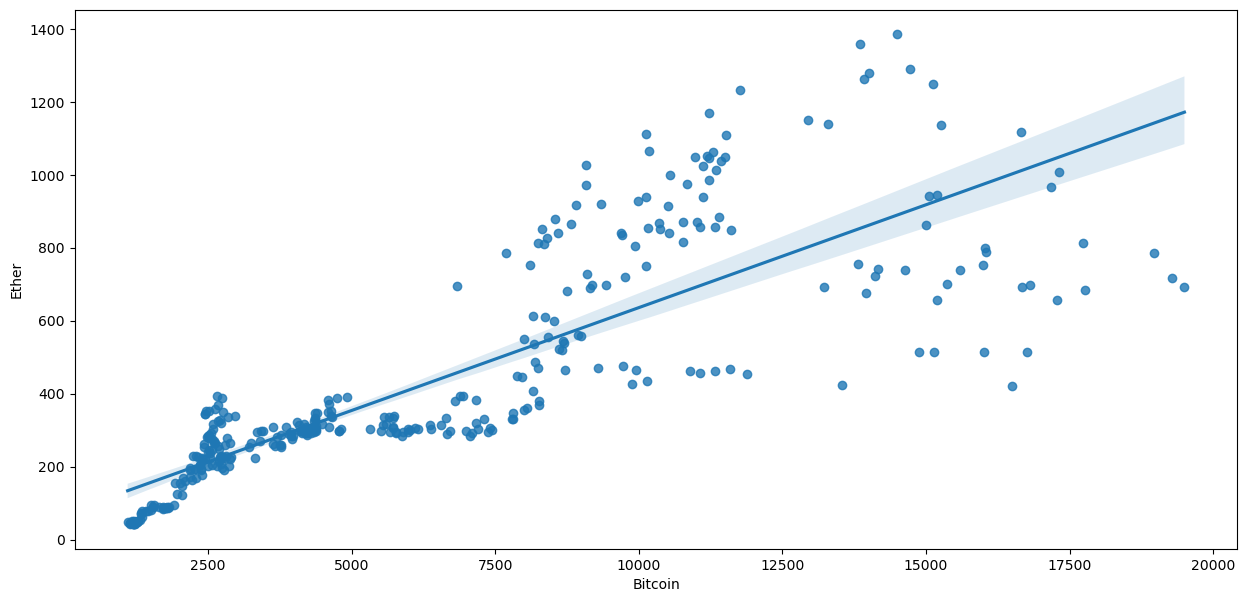

In [88]:
fig, ax = plt.subplots(figsize=(15,7))
sns.regplot(x="Bitcoin",y="Ether",data=df_cleaned,ax=ax)

In [89]:
df_cleaned['Bitcoin'].quantile(.2)

2438.8627342857144

If you calculate dataset.quantile(0.2) on a pandas DataFrame or Series dataset, you will get the value that separates the data into five equal parts, with 20% of the data below the value and 80% of the data above the value.

C:\Users\rokzu\AppData\Local\Temp\ipykernel_21648\4232771386.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Bitcoin'],ax=ax,bins=50,


RuntimeError: Cumulative KDE evaluation requires scipy

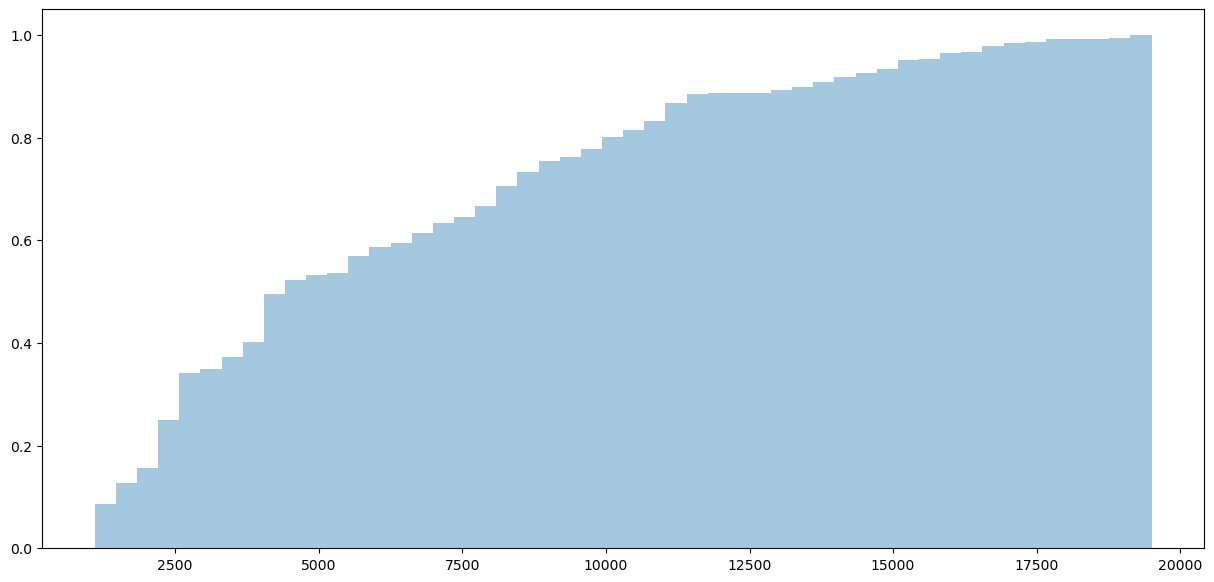

In [92]:
fig, ax = plt.subplots(figsize=(15,7))
sns.distplot(df_cleaned['Bitcoin'],ax=ax,bins=50,
            hist_kws=dict(cumulative=True),
            kde_kws=dict(cumulative=True))
ax.axhline(0.2,color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.2),color='red')

Quantile 0.25 == Percentile 25% == Quartile 1st

In [94]:
df['Bitcoin'].max() - df['Bitcoin'].min()

142706.6475416667

In [95]:
df_cleaned['Bitcoin'].max() - df_cleaned['Bitcoin'].min()

18399.51420833333

Range is **really** sensitive to outliers.

In [97]:
df['Bitcoin'].var()

103766537.75278114

In [98]:
df['Bitcoin'].std()

10186.586167739471

In [99]:
df_cleaned['Bitcoin'].std()

4513.757662530282

Both variance and std are sensible to outliers as well.

In [100]:
df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(0.25)

6597.494147619047

In [101]:
df_cleaned['Bitcoin'].quantile(.75) - df_cleaned['Bitcoin'].quantile(0.25)

6548.249242559523

In [102]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
lower_limit = df['Bitcoin'].mean() - 2 * df['Bitcoin'].std()

In [103]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 27369.176357301683
Lower Limit: -13377.168313656202


C:\Users\rokzu\AppData\Local\Temp\ipykernel_21648\1109975596.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bitcoin'], ax=ax)


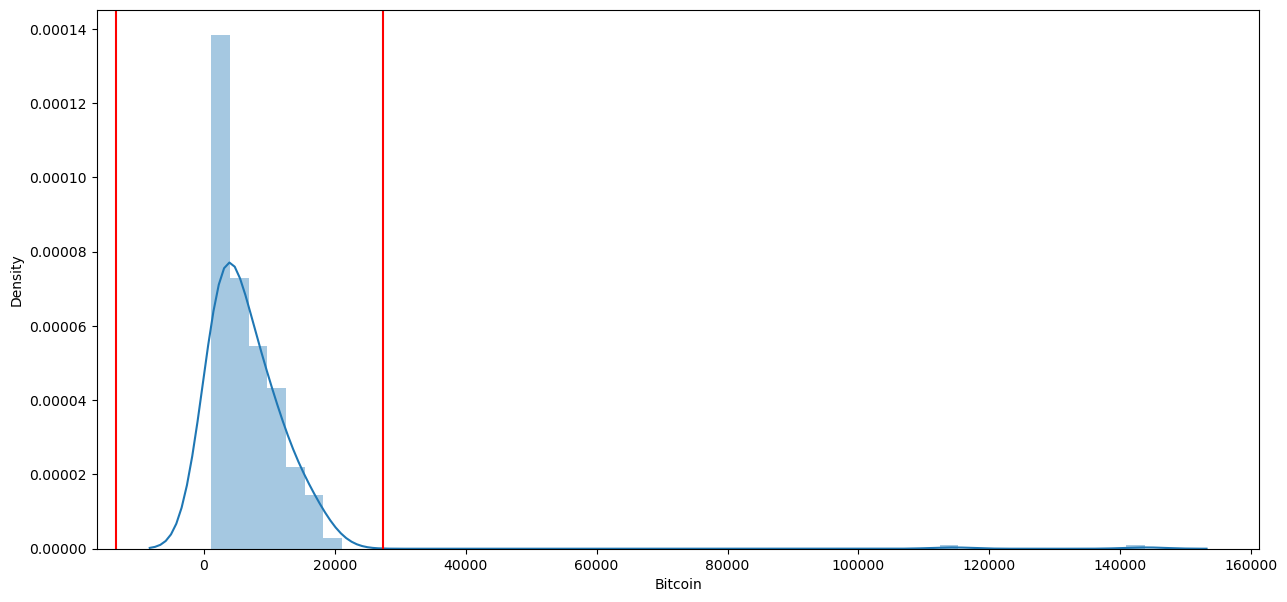

In [104]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

In [105]:
iqr = df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)
iqr

6597.494147619047

In [106]:
upper_limit = df['Bitcoin'].mean() + 2 * iqr
lower_limit = df['Bitcoin'].mean() - 2 * iqr

In [107]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 20190.992317060834
Lower Limit: -6198.9842734153535


C:\Users\rokzu\AppData\Local\Temp\ipykernel_21648\1109975596.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bitcoin'], ax=ax)


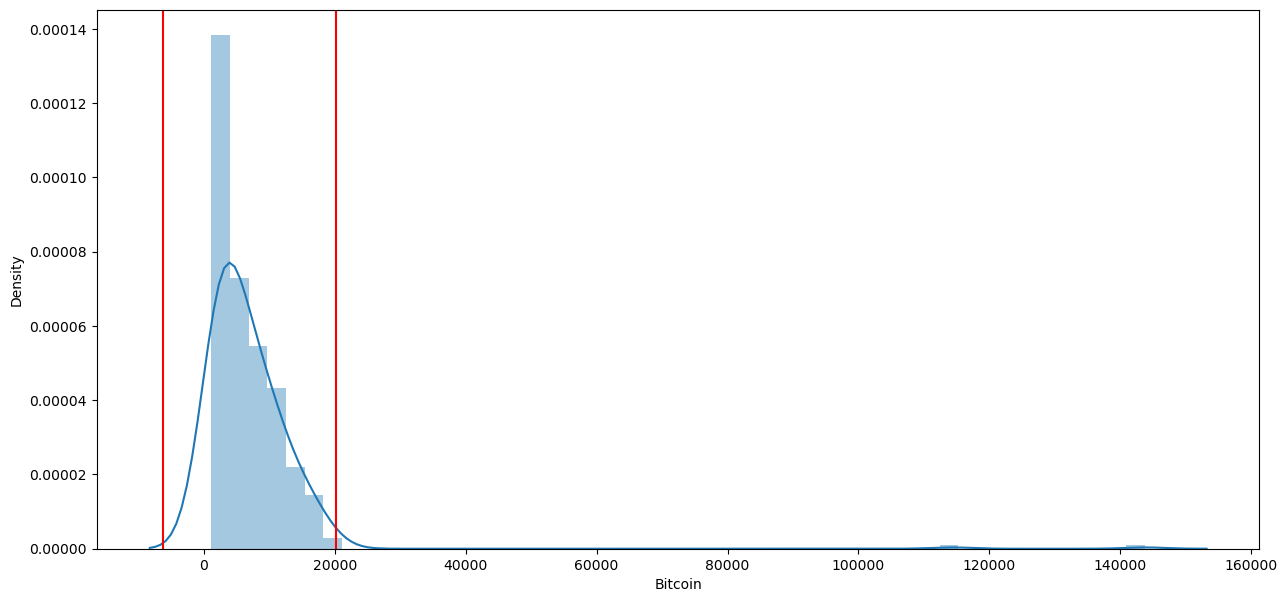

In [108]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

In [109]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()


<AxesSubplot: xlabel='Timestamp'>

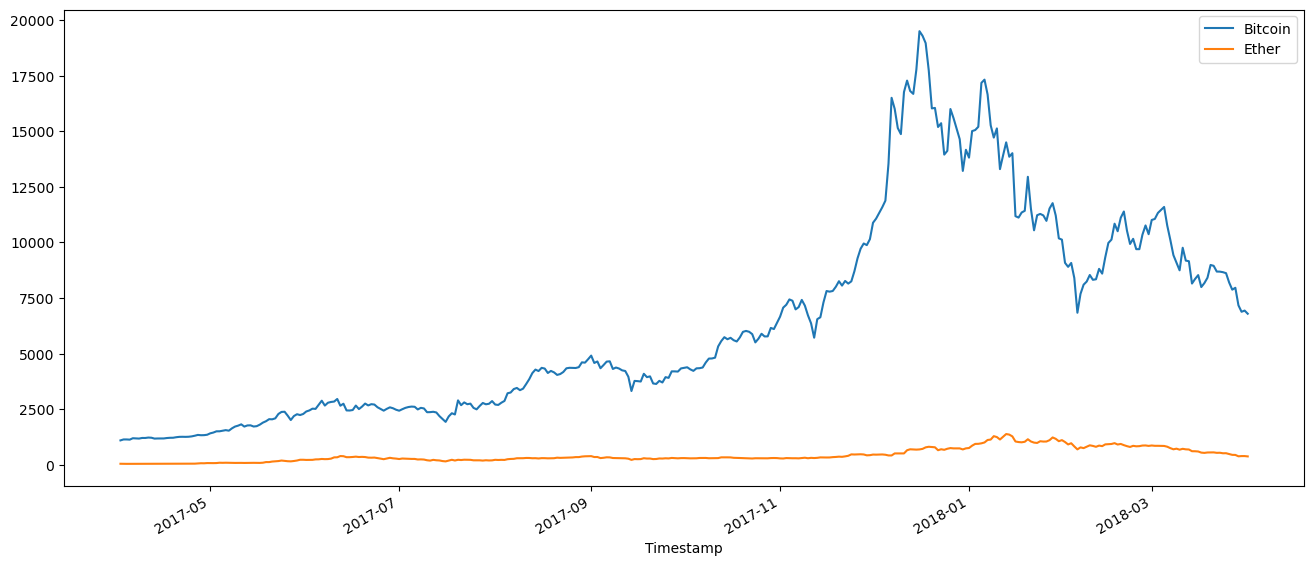

In [110]:
df[df['Bitcoin'] < upper_limit].plot(figsize=(16, 7))

<AxesSubplot: xlabel='Timestamp'>

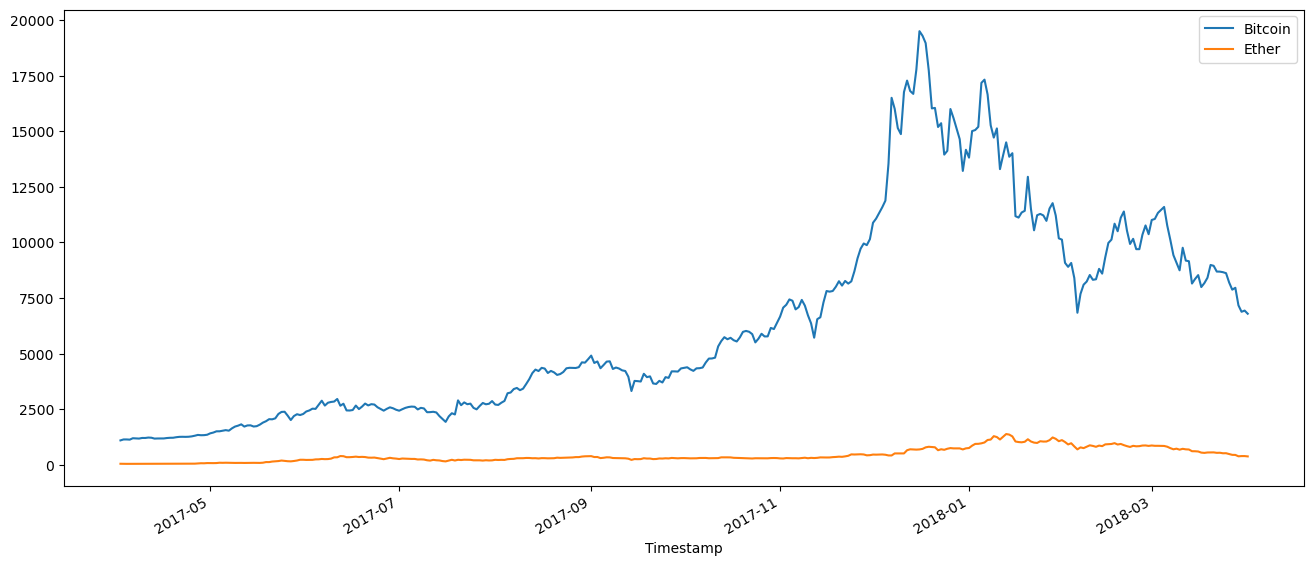

In [111]:
df.drop(df[df['Bitcoin'] > upper_limit].index).plot(figsize=(16, 7))